# Bike Sharing assignment

## Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #for doing minmax scaling
import statsmodels.api as sm
from sklearn.metrics import r2_score
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE #library for RFE
from sklearn.linear_model import LinearRegression #compatible with RFE library

In [3]:
#reading the data
Bikes_share = pd.read_csv("day.csv")

In [4]:
Bikes_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
Bikes_share.shape

(730, 16)

In [6]:
Bikes_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see there are no nulls in the data, however, to verify, checking the percentage

In [7]:
round(100*(Bikes_share.isnull().sum()/len(Bikes_share)), 2).sort_values(ascending=False)


cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

All are zero, so no nulls identified in the data

In [8]:
Bikes_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preparation and Visualising

We are going to use matplotlib and seaborn for visualisation and before visualising, we will drop the unnecessary variables

Here we are going to drop the columns listed below:
- instant: record index is an index, it does not bring any significance to the model 
- dteday : all the date related columns year, month, weekday are all available as separate columns
- casual : since there is cnt with the total count, this can be dropped
- registered: since there is cnt with the total count, this can also be dropped like casual


We are taking **cnt** as the target variable

In [9]:
#dropping the unnecessary columns
Bikes_share.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)
Bikes_share.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Now that we have dropped the unnecessary columns, we have to convert categorical variables from numbers to their respective strings

season has inputs 1, 2,3, 4 which denotes 1:spring, 2:summer, 3:fall, 4:winter. We will replace the numbers with the corresponding strings.

The columns that need to be converted are :
- season
- mnth
- weekday
- weathersit:
    Since the string name is very long we are going to use 1:Clear-Partlycloudy 2:Mist-Cloudy, 3:LightSnow-lightRain-Thunderstorm-Scatteredclouds , 4:HeavyRain-IcePallets-Thunderstorm-Mist-Snow-Fog


In [10]:
Bikes_share['season'] = Bikes_share['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
Bikes_share['mnth'] = Bikes_share['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
Bikes_share['weekday'] = Bikes_share['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
Bikes_share['weathersit'] = Bikes_share['weathersit'].map({1:'Clear-Partlycloudy',2:'Mist-Cloudy',3:'LightSnow-lightRain-Thunderstorm-Scatteredclouds',4:'HeavyRain-IcePallets-Thunderstorm-Mist-Snow-Fog'})
Bikes_share.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear-Partlycloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear-Partlycloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear-Partlycloudy,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
Bikes_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


All the categorical variables have been converted from int to object

We will use a boxplot to visualize categorical variables

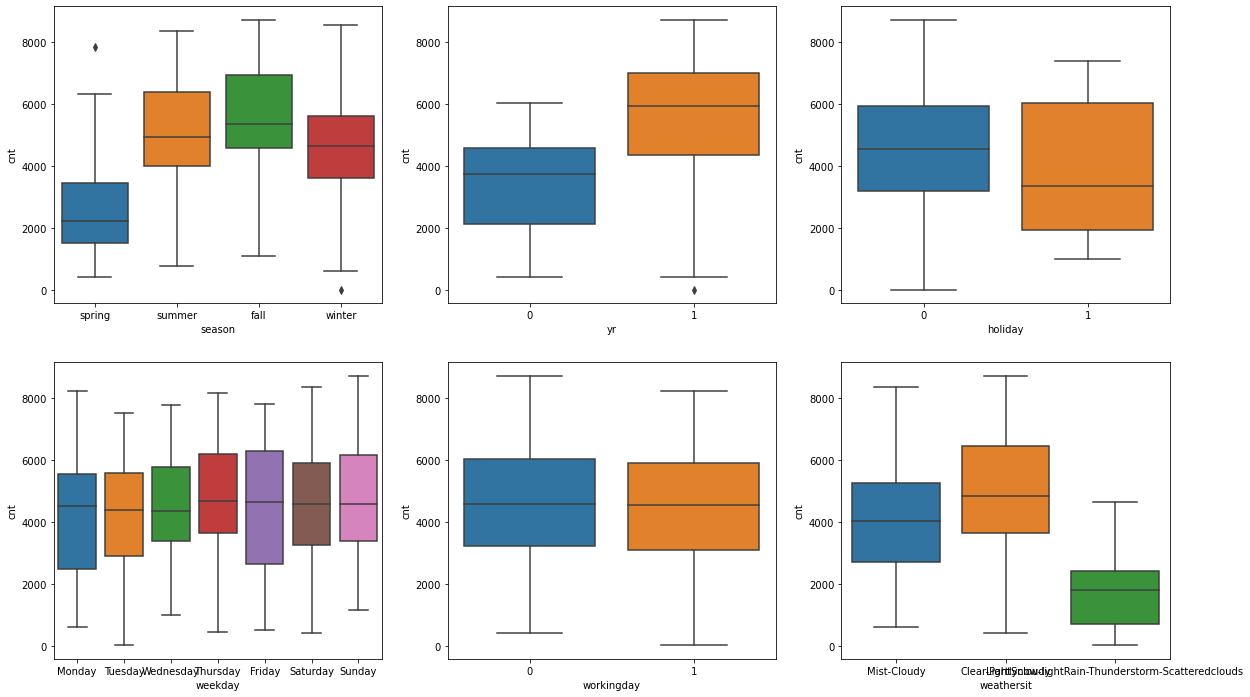

In [12]:
def boxplot_categorical(categoricalvar,target):
    plt.figure(figsize=(20,12))
    for i in range(0,len(categoricalvar)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x=categoricalvar[i],y=target,data=Bikes_share)
    plt.show()

categoricalvar= ['season','yr','holiday','weekday','workingday','weathersit']
boxplot_categorical(categoricalvar,'cnt')

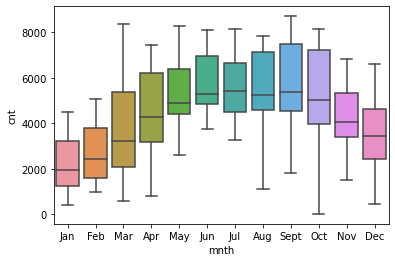

In [13]:
sns.boxplot(x = 'mnth', y = 'cnt', data = Bikes_share)
plt.show()

Observations from the plots:

- Season : From the plot, we could see that the most number of the bookings have happened during the fall which has a median which is between **5000 and 6000** 
- Year : in yr, from the plot we could see that there is a drastic increase in the number of bookings from 2018 to 2019, where the median of slightly less than 4000 in **2018** and aproximately close to 6000 in **2019**
- Week day: we can see that there are bookings every day which varies in a range of independent medians between **4000 and 5000** 
- Working day: It seems that the median is approximately equal whether it's a working day or not
- Weather Situation: In weathersit, we can clearly see that most of the bike bookings have been done during **Clear-Few clouds**. And the least during **LightSnow-lightRain-Thunderstorm-Scatteredclouds** and no bookings were done during **HeavyRain-IcePallets-Thunderstorm-Mist-Snow-Fog**


For more precise numbers, we could visualize in pie plots


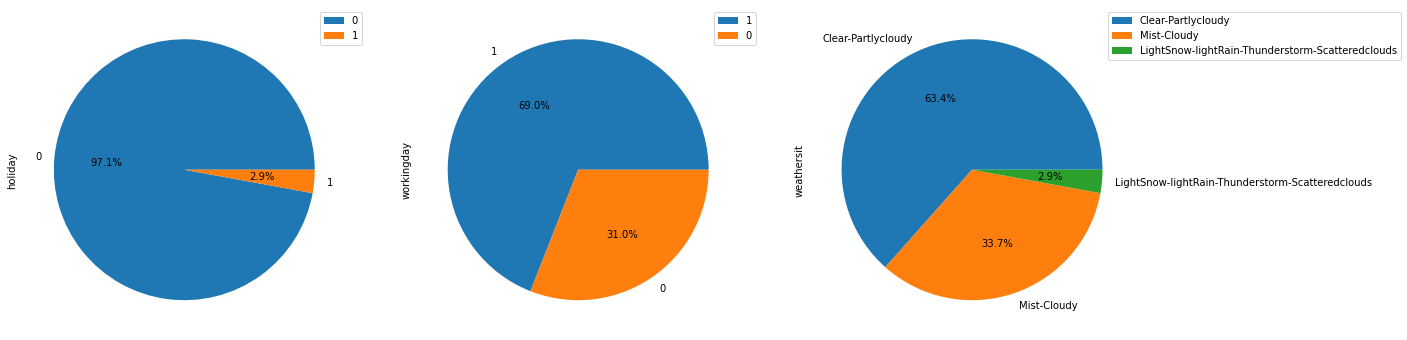

In [14]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
Bikes_share.holiday.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(loc="best", bbox_to_anchor=(0.9, 0, 0.05, 1))

plt.subplot(1,3,2)
Bikes_share.workingday.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(loc="best", bbox_to_anchor=(0.9, 0, 0.05, 1))

plt.subplot(1,3,3)
Bikes_share.weathersit.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(loc="best", bbox_to_anchor=(0.9, 0, 0.05, 1))

plt.show()

Observation from Pie plots:
- holiday: 97.1% of the bookings have been done during the days which are not holidays and 2.9% during holidays.
- workingday: 69% of the bookings were done on workingdays and 31% during non working days.
- weathersit: the least number of bookings of 2.9% were done during LightSnow-lightRain-Thunderstorm-Scatteredclouds and most of the bookings of 63.4% were when the weathersit was Clear-Partlycloudy

### Creating Dummy variables

In [15]:
def dummy(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
Bikes_share= dummy('season',Bikes_share)
Bikes_share= dummy('mnth',Bikes_share)
Bikes_share= dummy('weekday',Bikes_share)
Bikes_share= dummy('weathersit',Bikes_share)
Bikes_share.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm-Scatteredclouds,Mist-Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Bikes_share.shape

(730, 30)

In [17]:
Bikes_share.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm-Scatteredclouds,Mist-Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the Data into Training and Testing Sets

As we know, the first basic step of regression is performing train-test split

In [18]:
np.random.seed(0)
df_train, df_test = train_test_split(Bikes_share, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Visualising numerical variables

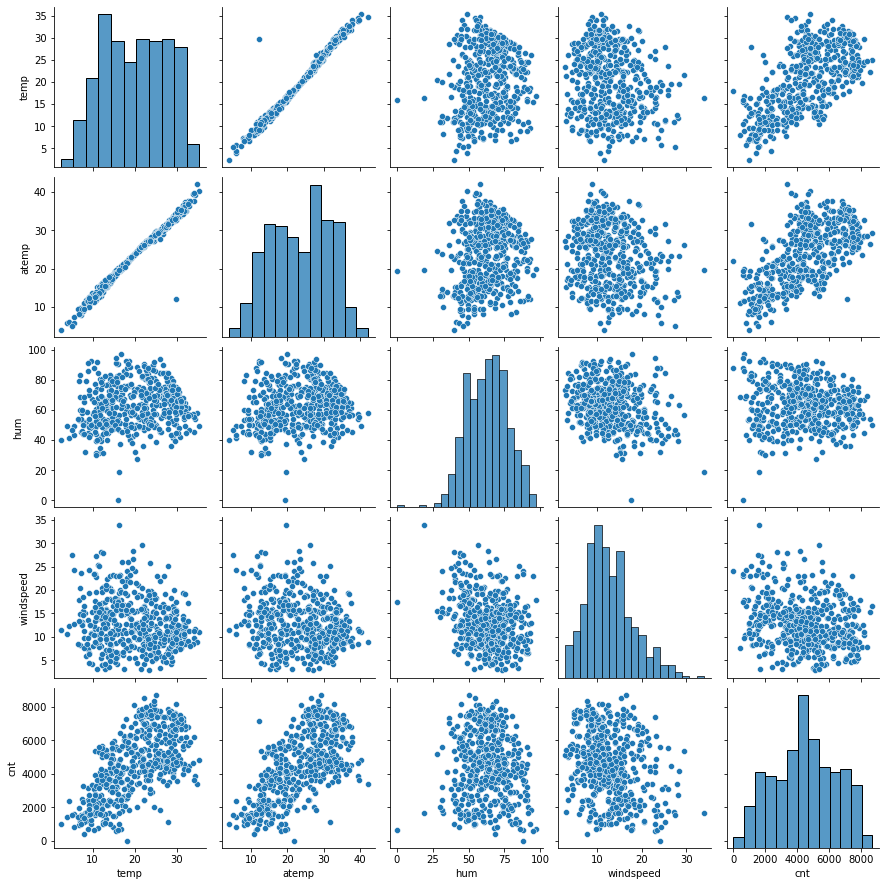

In [19]:
sns.pairplot(df_train[[ 'temp','atemp', 'hum', 'windspeed','cnt']])
plt.show()


From the Pair plot above we can see that the **temp** and **atemp** have a linear relation. Also it can be seen that temp and atemp have linear relation with **cnt** as well.

To see the correlations, we can plot a heatmap


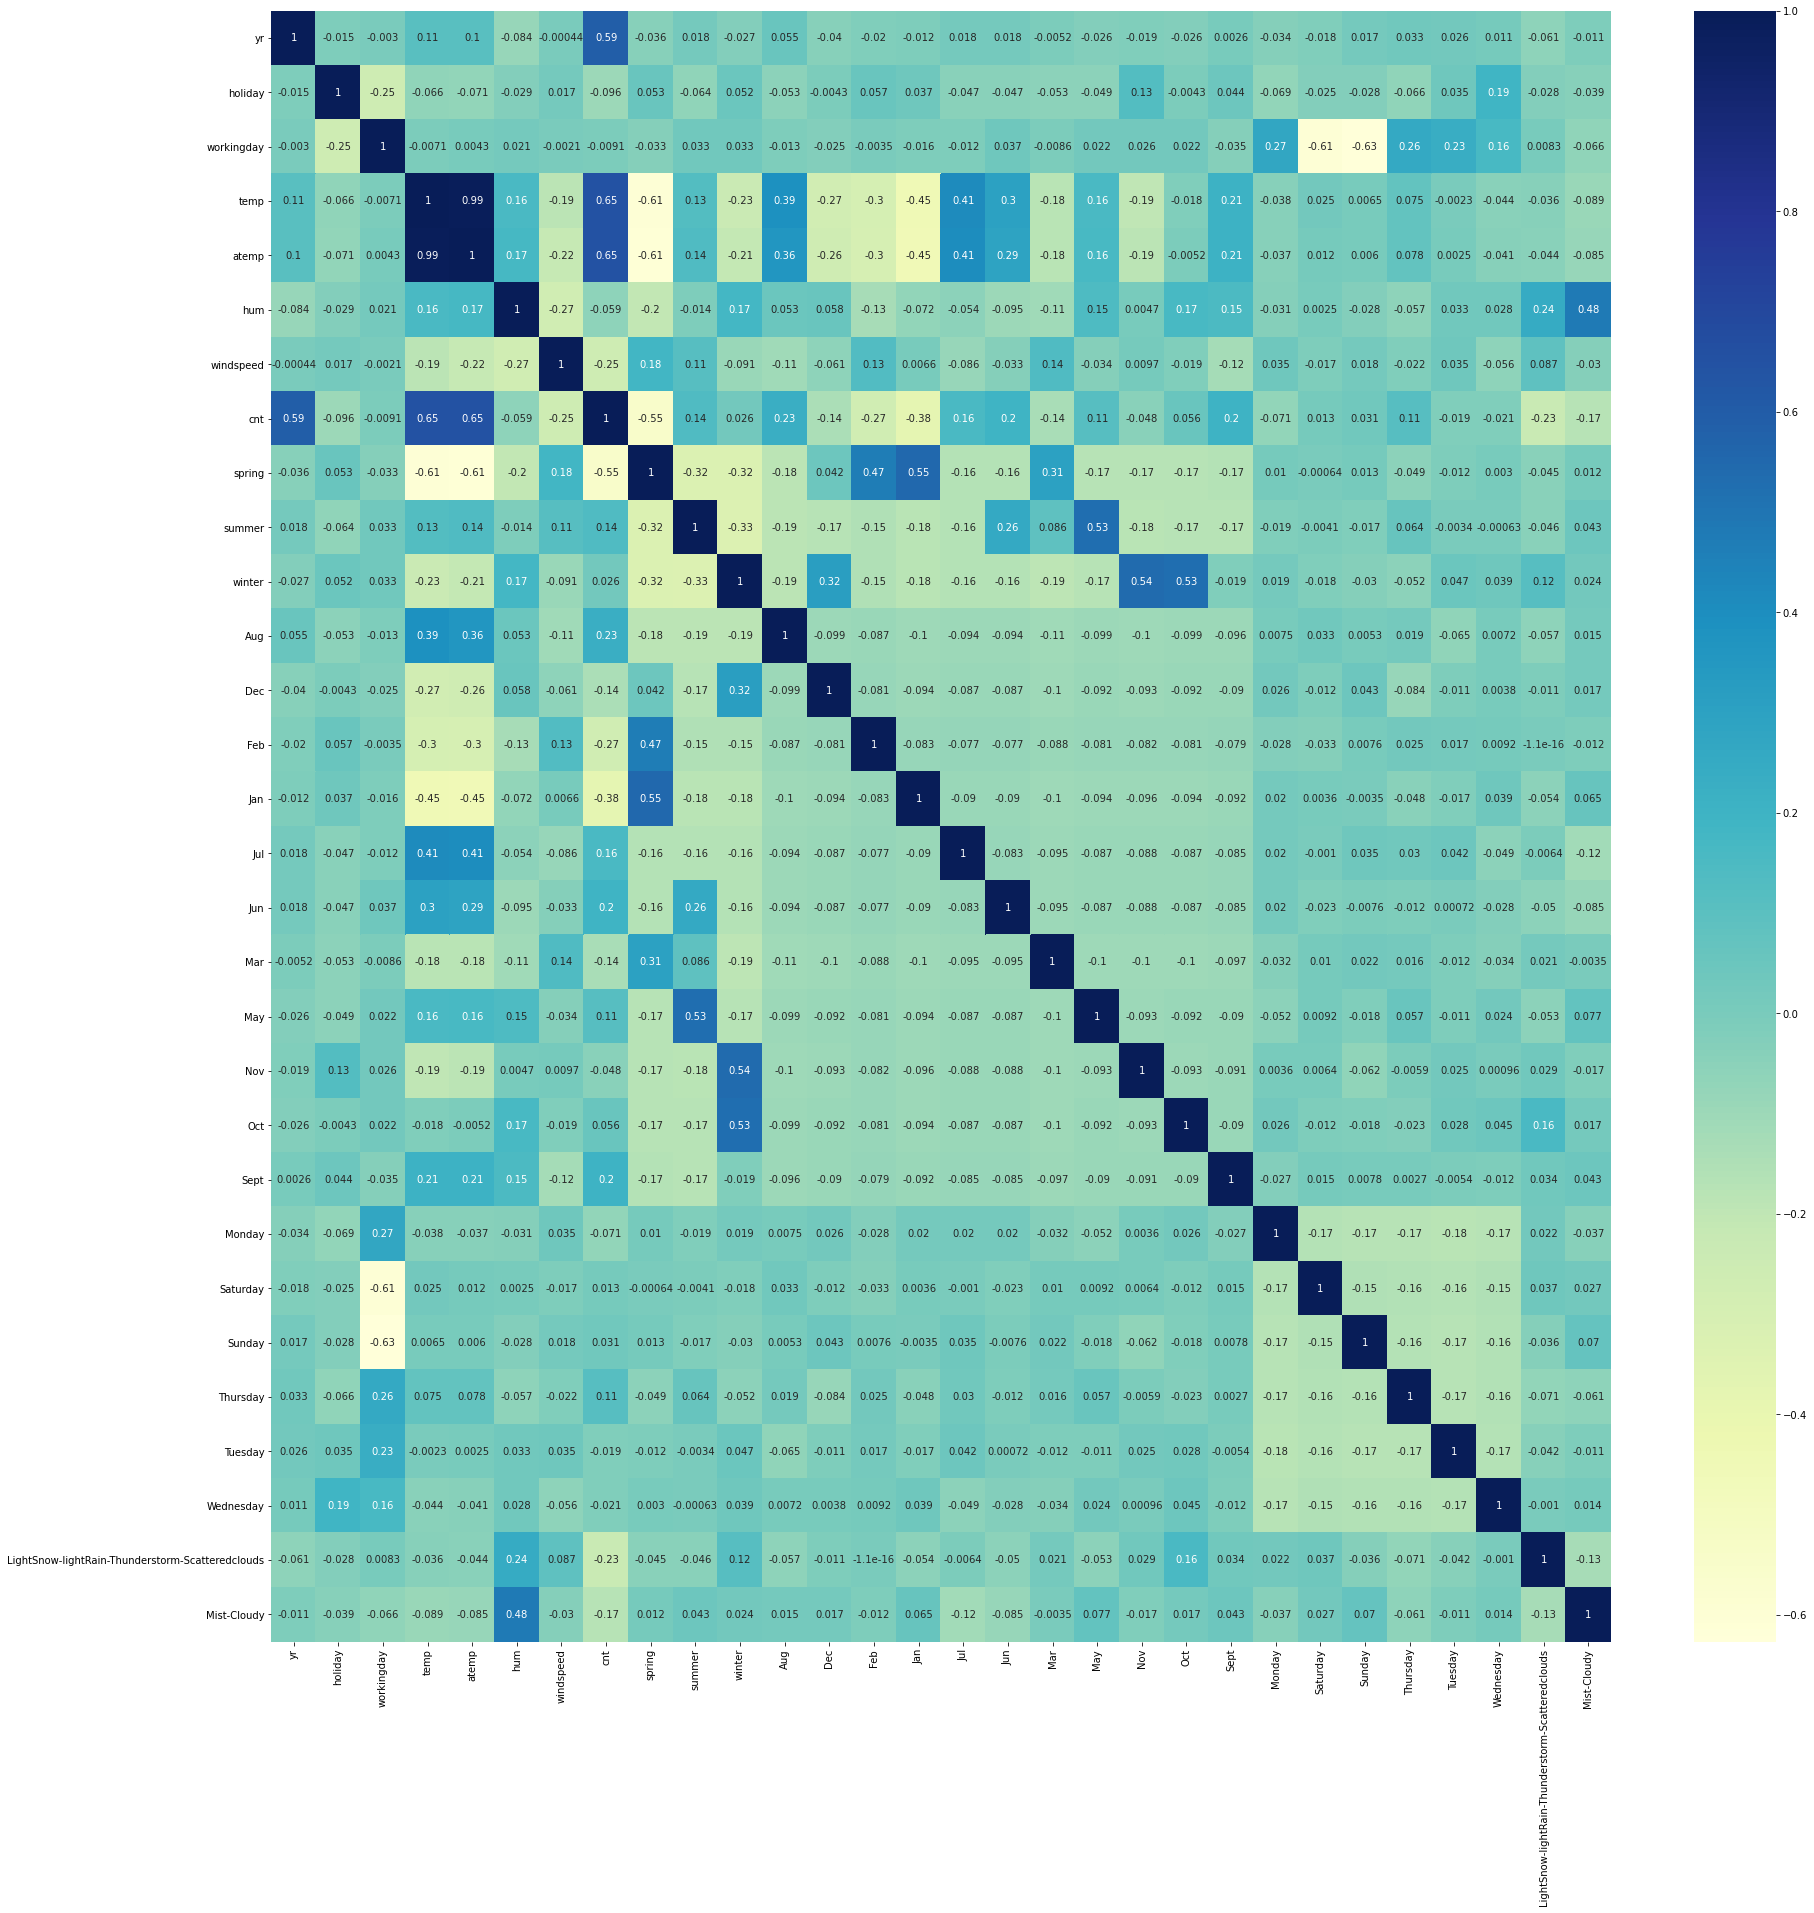

In [20]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


We can use this heatmap which shows that all the multicollinearity of all the variables refer this using VIF and p-value to identify the correct variable to select or eliminate from the model

#### Rescaling the features

To rescale the features, we will use MinMax scaling from sklearn

In [21]:
scaler = MinMaxScaler()

In [22]:
#applying scaler to all columns except dummy variables

num_vars=['temp','atemp','hum','windspeed','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm-Scatteredclouds,Mist-Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [23]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm-Scatteredclouds,Mist-Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and y sets for model 

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train


### RFE 

Recursive Function Elimination

In [25]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('LightSnow-lightRain-Thunderstorm-Scatteredclouds', True, 1),
 ('Mist-Cloudy', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sept',
       'LightSnow-lightRain-Thunderstorm-Scatteredclouds', 'Mist-Cloudy'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sept,LightSnow-lightRain-Thunderstorm-Scatteredclouds,Mist-Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,1
79,0,0,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,0,1


In [30]:
#building a function to build model 

def build_model(X,y):
    #adding constant variable
    X=sm.add_constant(X)
    lm=sm.OLS(y,X).fit()
    #print summary
    print(lm.summary())
    return X

In [31]:
X_train_new= build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        22:18:25   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [32]:
#checking VIF 
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.92
12,Nov,1.77
10,Jan,1.68
15,Mist-Cloudy,1.57
9,Dec,1.50


We could have:
- High p-value , high VIF
- High-low:
    - High P , Low VIF : remove first
    - Low P , High VIF : remove others 
- Low p , low VIF

Here we remove dec since its p-value is high and once we check the VIF which is the correlations, the high value VIF may drop 

In [33]:
#dropping 'Dec' because P-value higher than the rest
X_train_new = X_train_new.drop(['Dec'], axis=1)

In [34]:
#building new model

X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          4.41e-189
Time:                        22:18:25   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [35]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,78.35
6,spring,5.20
3,temp,3.97
8,winter,3.76
7,summer,2.68
4,hum,1.90
9,Jan,1.57
14,Mist-Cloudy,1.56
10,Jul,1.49
11,Nov,1.49


In [36]:
#dropping 'Nov' as the the p-value is very high 

X_train_new = X_train_new.drop(['Nov'], axis=1)

In [37]:
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          7.59e-190
Time:                        22:18:25   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [38]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.76
6,spring,5.08
3,temp,3.89
8,winter,3.59
7,summer,2.65
4,hum,1.90
9,Jan,1.57
13,Mist-Cloudy,1.56
10,Jul,1.49
11,Sept,1.30


In [39]:
#dropping 'Jan' as p-value greater than 0.05

X_train_new = X_train_new.drop(['Jan'], axis=1)


In [40]:
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          2.95e-190
Time:                        22:18:26   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [41]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
6,spring,5.02
3,temp,3.61
8,winter,3.48
7,summer,2.62
4,hum,1.89
12,Mist-Cloudy,1.56
9,Jul,1.48
10,Sept,1.30
11,LightSnow-lightRain-Thunderstorm-Scatteredclouds,1.24


Since all the columns with high p-value has been dropped, need to drop columns with VIF more than 5

Here 'spring' has a VIF of 5.02.
Hence dropping it

In [42]:
X_train_new = X_train_new.drop(['spring'], axis=1)


In [43]:
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          6.89e-190
Time:                        22:18:26   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [44]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
11,Mist-Cloudy,1.55
8,Jul,1.43
6,summer,1.33
7,winter,1.29
10,LightSnow-lightRain-Thunderstorm-Scatteredclouds,1.24
9,Sept,1.19
5,windspeed,1.18


In [45]:
#dropping 'Jul' as there is a higher p value compared to the other variables
X_train_new=X_train_new.drop(["Jul"], axis = 1)


In [46]:
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.32e-189
Time:                        22:18:26   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [47]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,hum,1.86
10,Mist-Cloudy,1.55
3,temp,1.27
7,winter,1.25
9,LightSnow-lightRain-Thunderstorm-Scatteredclouds,1.23
6,summer,1.19
5,windspeed,1.18
8,Sept,1.11
1,yr,1.03


Now we have all the p-values as '0'. Now we check for negative correlations

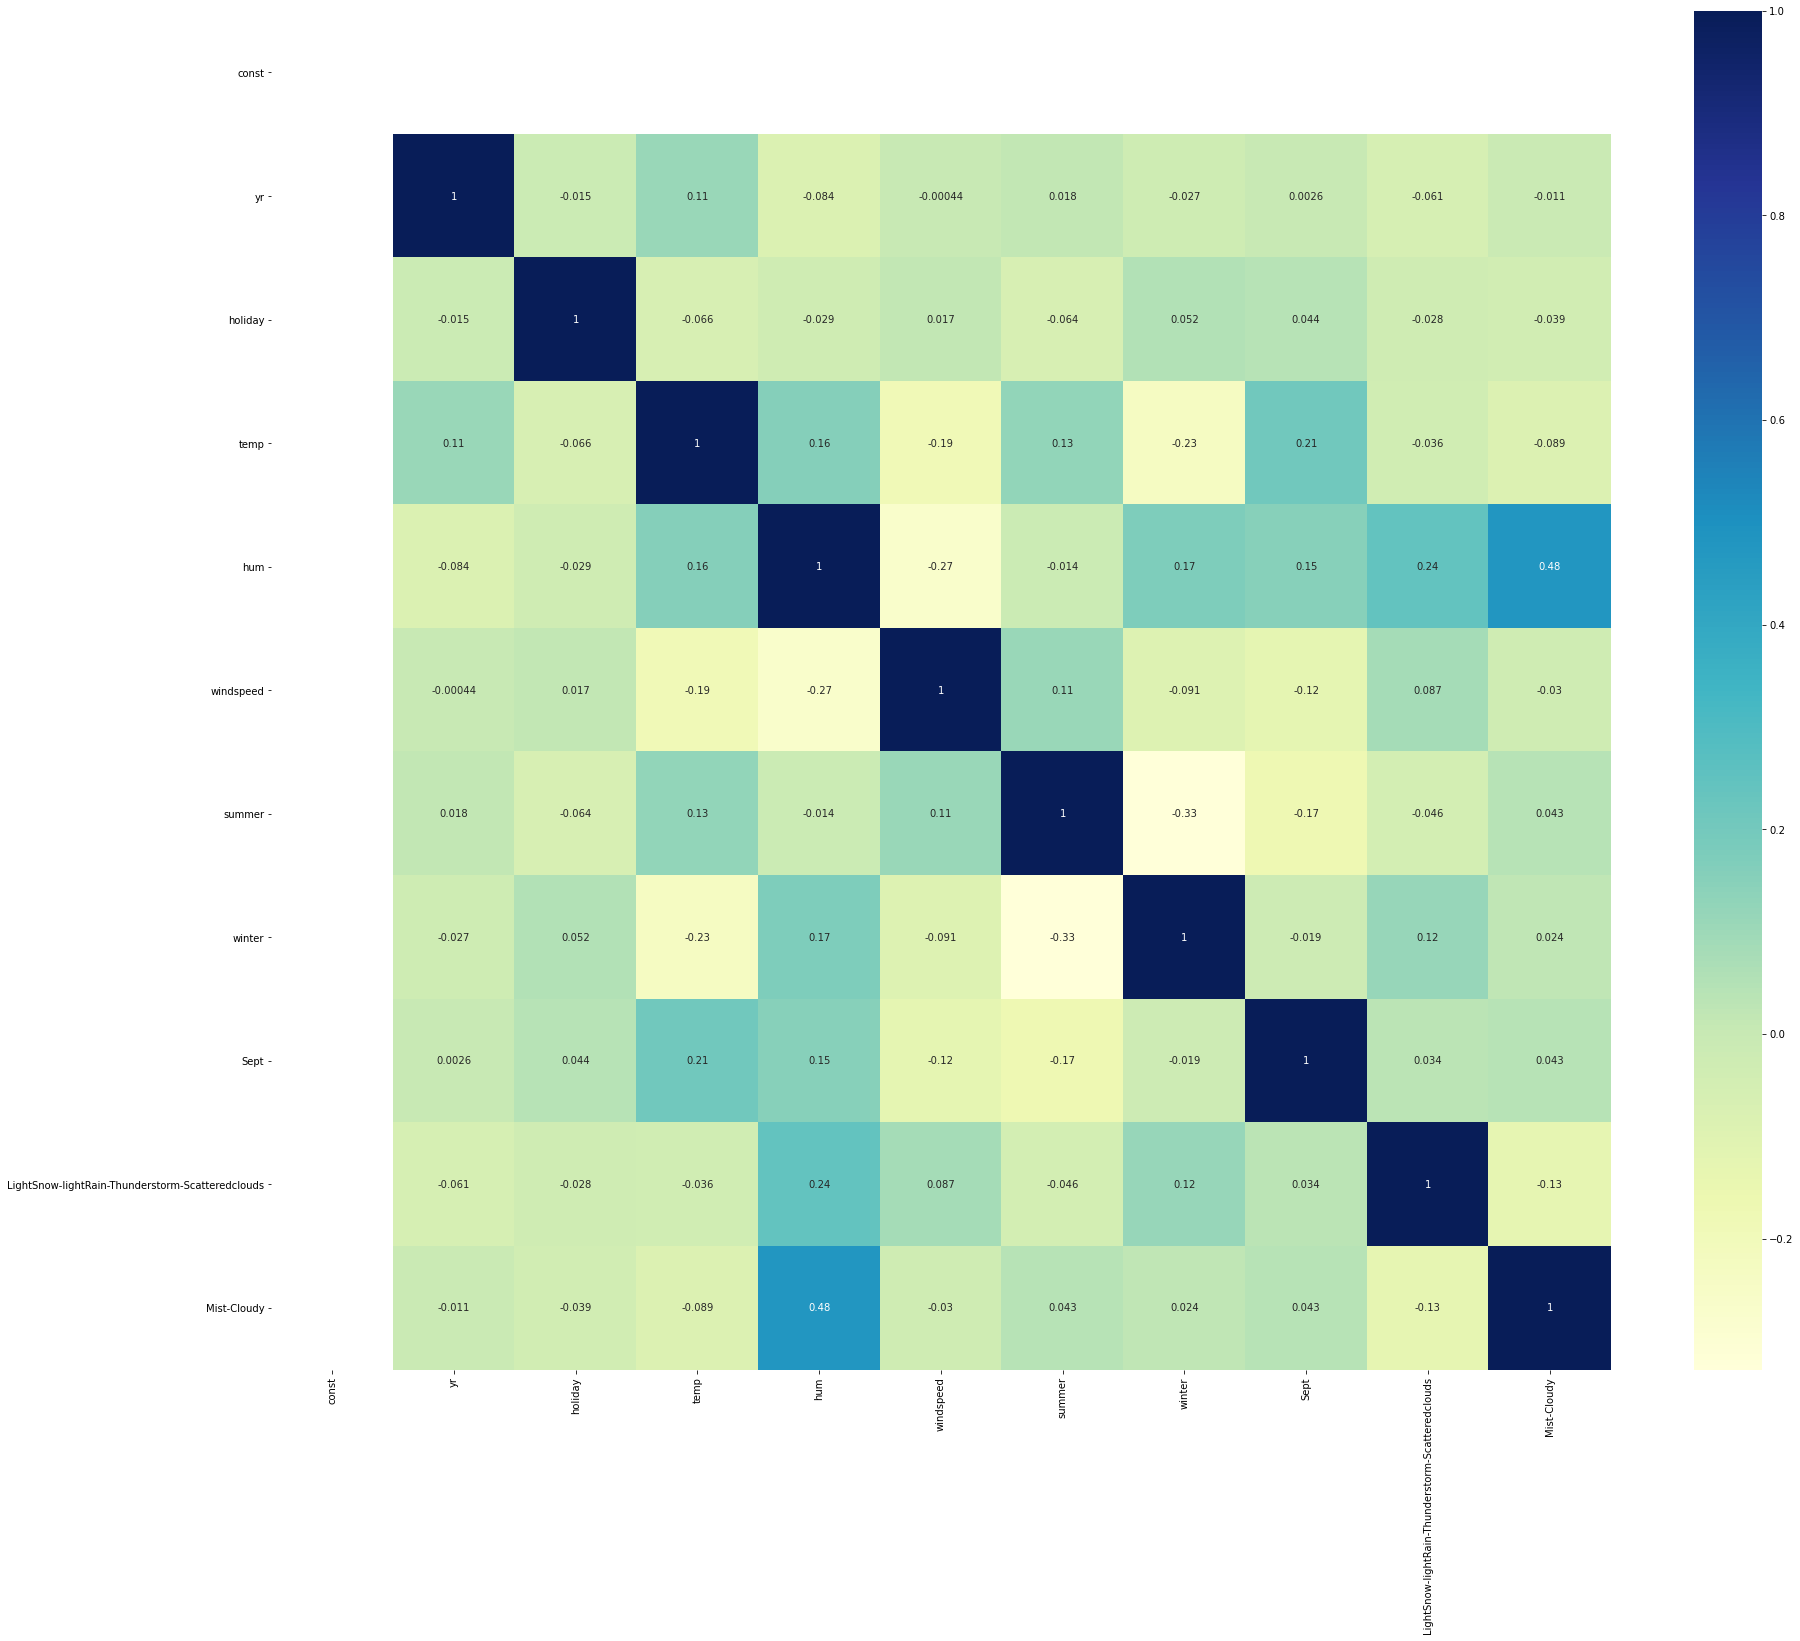

In [48]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()


From the heatmap we can see there are no big negative correlations.



Observations:

- Model has 10 variables  and R-squared - 0.837 and adjusted R-squared - 0.834
- P-values are 0
- VIF less than 2
- Prob(F-statistic) is approximately 0

We can say we have a good model

Now we can start on Residual analysis on the model

## Residual Analysis of the train data

In [49]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_cnt= lm.predict(X_train_new)


Text(0.5, 0, 'Errors')

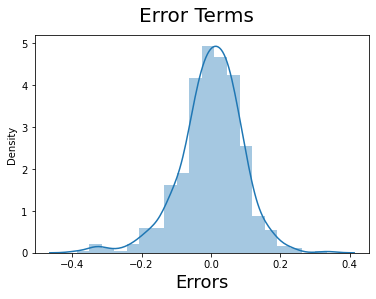

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   
##


### Model Building Assumptions:

- Linear relationship
- Multivariate normally
- No or little multicollinearity
- No auto-correlation
- Homoscedasticity

Error terms look like they are approximately normally disturbed, so the assumption on the linear modelling seems to be fulfilled

### Prediction and Evaluation on test set

In [51]:
#Scaling the test set
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm-Scatteredclouds,Mist-Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#Dividing into X and y
y_test = df_test.pop('cnt')
X_test = df_test


In [53]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [54]:
# Making predictions
y_pred = lm.predict(X_test_new)


In [55]:
#Evaluation of test through comparison of y_pred and y_test
r2=r2_score(y_test, y_pred)
print(r2)

0.8040192993235495


In [56]:
X_test_new.shape


(220, 11)

In [57]:
# We already have the value of R^2 (calculated in above step)
# n is number of rows in X
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.793654935345468

Text(0, 0.5, 'y_pred')

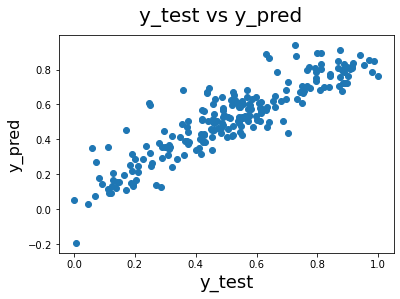

In [58]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Final Observation: 

- Train R-squared score : 0.837
- Train adjusted R-squared score:0.834
- Test R-squared : 0.804
- Test adjusted R-squared score: 0.793



This seems to be a really good model that can very well very well for various datasets


In [59]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.32e-189
Time:                        22:21:08   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

From the model , The best fitted line equation is : 

cnt = 0.2261 + 0.2289 * yr - 0.0975 * holiday + 0.5708 * temp - 0.1756 * hum - 0.1870 * windspeed + 0.0907 * summer + 0.1391 * winter + 0.1069 * Sept - 2353 * LightSnow-lightRain-Thunderstorm-Scatteredclouds - 0.0503 * Mist-Cloudy